# Simple Linear Regression

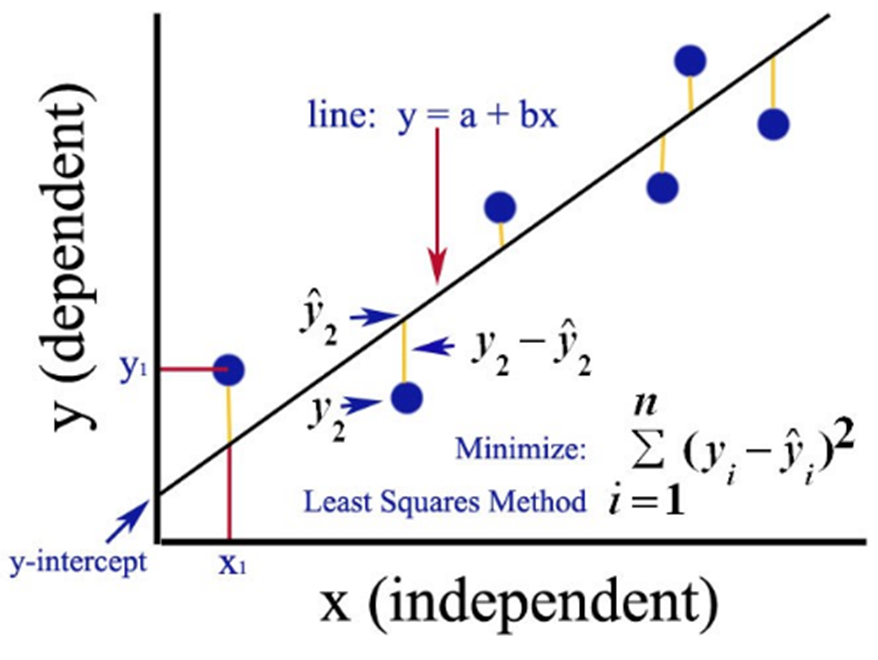

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion 
Load the training data Which contains target column

In [2]:
import pandas as pd 

df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Your goal is to predict the Profit , Profit is Target Feature or Y

# Step 2 - Perform basic data Quality checks

In [3]:
df.shape

(50, 5)

In [4]:
# Missing values
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
# Check duplicates in dataframe
df.duplicated().sum()

np.int64(0)

In [6]:
# Drop duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(50, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Step 3 - Perform Data visulization

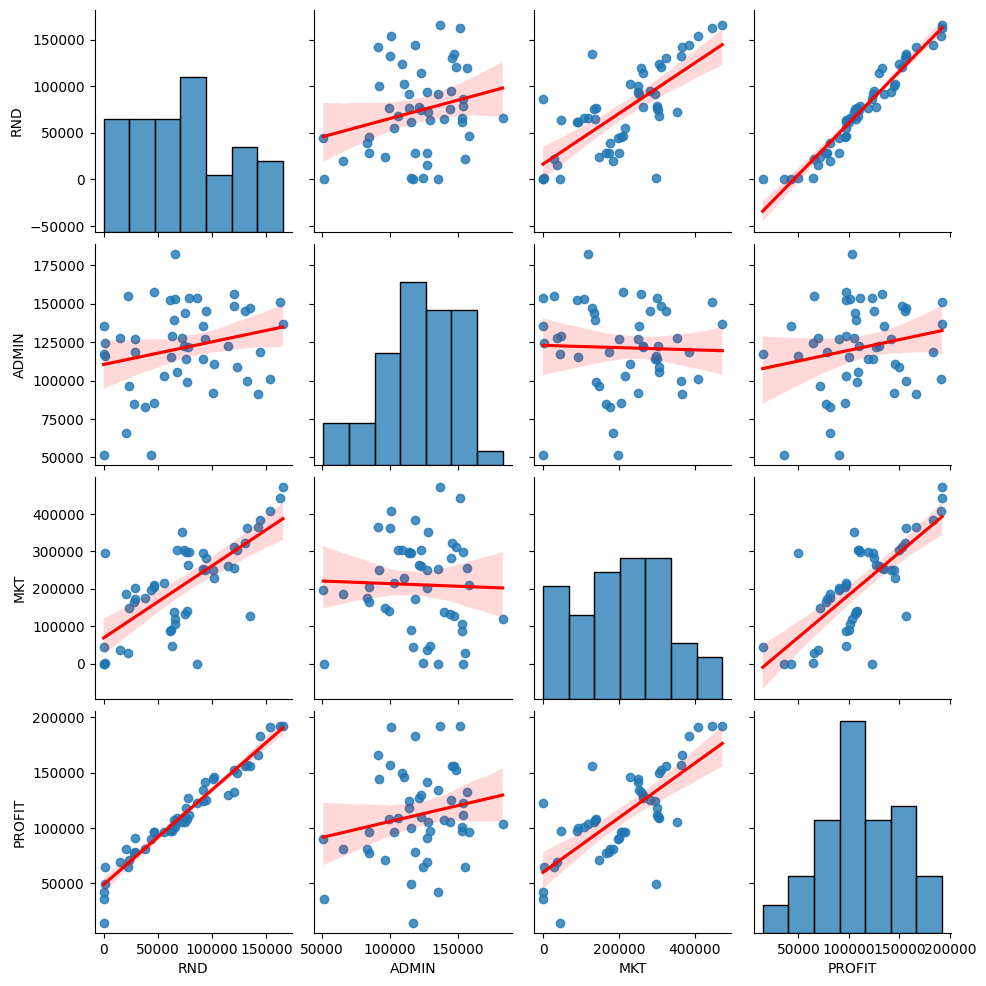

In [10]:
import seaborn as sns

sns.pairplot(df, kind="reg", plot_kws={"line_kws": {"color": "red"}})

In [12]:
corr = df.corr(numeric_only=True).round(4)
corr

,RND,ADMIN,MKT,PROFIT
RND,1.0000,0.2420,0.7242,0.9729
ADMIN,0.2420,1.0000,-0.0322,0.2007
MKT,0.7242,-0.0322,1.0000,0.7478
PROFIT,0.9729,0.2007,0.7478,1.0000


<Axes: >

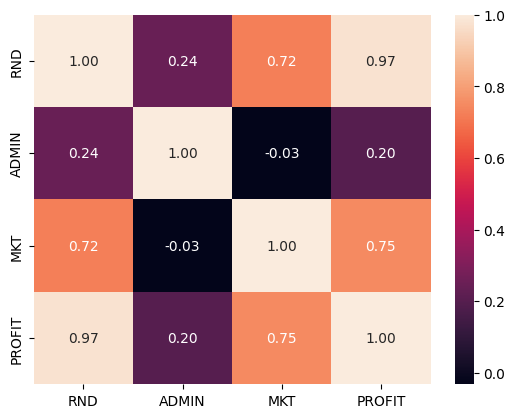

In [14]:
sns.heatmap(data=corr, annot=True, fmt=".2f")

# From above visulization RND and PROFIT are strongly Corelated 

1. Target Feature - PROFIT (Y)
2. Predictor Feature - RND (X)
3. PROFIT ~ RND
4. $ PROFIT = B0 + B1*RND $

# Step 4 - Seperate X(RND) and Y(PROFIT)

In [15]:
df.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [16]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [17]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [18]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Step 5 - Build the model

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# Model intercept
model.intercept_

array([49032.89914125])

In [21]:
# Model Coefficient
model.coef_

array([[0.85429137]])

# PROFIT_pred = 49032.90 + 0.8543 * RND

### If RND increases by 1, Profit will increase by 0.8543

<Axes: xlabel='RND', ylabel='PROFIT'>

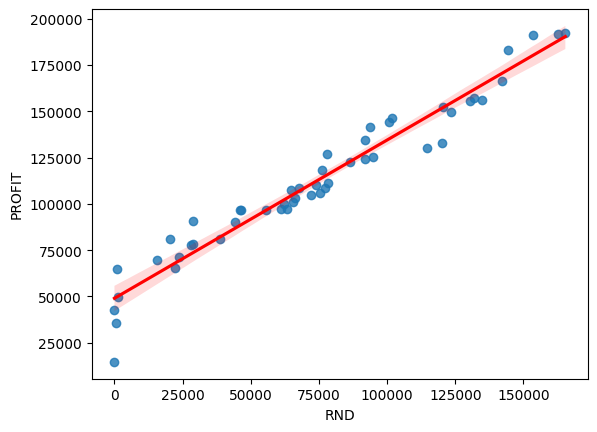

In [23]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})

# Step 6 - Model Evaluation

In [25]:
# R2 score for data
model.score(X, Y)

0.9465353160804393

In [28]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [29]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [24]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [30]:
def evaluate_model(model, x, y):
    # Predict the result from model
    ypred = model.predict(x)
    # Calulate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [31]:
evaluate_model(model, X, Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 : 94.65%


# As R2 score is greater than 80% this model is good model
# You can use above model for out of sample prediction

# Step 7 - Out of Sample prediction

In [32]:
X.head().values

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [38]:
rnd = 2_00_000

profit = model.predict([[rnd]]).round(2)
print(profit)

[[219891.17]]
